# Working with Data APIs

**Adapted from: Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [1]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [2]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [3]:
print(response)

<Response [200]>


In [4]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1551915653000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.7.0","count":290},"features":[{"type":"Feature","properties":{"mag":2.9,"place":"71km SSW of Kobuk, Alaska","time":1551915198531,"updated":1551915581128,"tz":-540,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/ak0192zvtn3t","detail":"https://earthquake.usgs.gov/eart


In [5]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [6]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'type': 'Feature', 'properties': {'mag': 2.9, 'place': '71km SSW of Kobuk, Alaska', 'time': 1551915198531, 'updated': 1551915581128, 'tz': -540, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak0192zvtn3t', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak0192zvtn3t.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'automatic', 'tsunami': 0, 'sig': 129, 'net': 'ak', 'code': '0192zvtn3t', 'ids': ',ak0192zvtn3t,', 'sources': ',ak,', 'types': ',geoserve,origin,', 'nst': None, 'dmin': None, 'rms': 0.82, 'gap': None, 'magType': 'ml', 'type': 'earthquake', 'title': 'M 2.9 - 71km SSW of Kobuk, Alaska'}, 'geometry': {'type': 'Point', 'coordinates': [-157.225, 66.2829, 0]}, 'id': 'ak0192zvtn3t'}


In [7]:
# print it more clearly
#1st quake
pp.pprint(quakes[0]['geometry'])
pp.pprint(quakes[0]['properties'])

{'coordinates': [-157.225, 66.2829, 0], 'type': 'Point'}
{'alert': None,
 'cdi': None,
 'code': '0192zvtn3t',
 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak0192zvtn3t.geojson',
 'dmin': None,
 'felt': None,
 'gap': None,
 'ids': ',ak0192zvtn3t,',
 'mag': 2.9,
 'magType': 'ml',
 'mmi': None,
 'net': 'ak',
 'nst': None,
 'place': '71km SSW of Kobuk, Alaska',
 'rms': 0.82,
 'sig': 129,
 'sources': ',ak,',
 'status': 'automatic',
 'time': 1551915198531,
 'title': 'M 2.9 - 71km SSW of Kobuk, Alaska',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',geoserve,origin,',
 'tz': -540,
 'updated': 1551915581128,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak0192zvtn3t'}


In [8]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 2.9 - 71km SSW of Kobuk, Alaska
M 3.1 - 78km SSW of Kobuk, Alaska
M 2.6 - 74km SSW of Kobuk, Alaska
M 3.3 - 64km SSW of Kobuk, Alaska
M 5.1 - 139km SE of L'Esperance Rock, New Zealand
M 5.2 - 68km SSW of Kobuk, Alaska
M 4.7 - 165km SW of Al Qunfidhah, Saudi Arabia
M 2.5 - 7km NE of Harper, Kansas
M 5.7 - 139km SE of L'Esperance Rock, New Zealand
M 5.0 - 161km SSW of Al Qunfidhah, Saudi Arabia
M 5.0 - Volcano Islands, Japan region
M 4.9 - 40km S of Ofunato, Japan
M 2.8 - 229km SE of Kodiak, Alaska
M 5.6 - 15km NNE of Ambunti, Papua New Guinea
M 4.0 - 29km SSE of Ofunato, Japan
M 2.6 - 16km NNE of Coalgate, Oklahoma
M 2.7 - 33km WNW of Kobuk, Alaska
M 2.5 - 17km NNW of Anchorage, Alaska
M 4.7 - 99km W of Nikol'skoye, Russia
M 2.9 - 290km ESE of Kodiak, Alaska
M 5.0 - 105km ESE of L'Esperance Rock, New Zealand
M 6.4 - 116km SE of L'Esperance Rock, New Zealand
M 3.0 - 2km WSW of Vega Baja, Puerto Rico
M 5.1 - 230km NNW of Tobelo, Indonesia
M 4.3 - 38km ESE of Savannah Bight, Honduras
M 2

M 5.5 - 37km SSE of Suncho Corral, Argentina
M 2.7 - 42km NNW of Culebra, Puerto Rico
M 3.2 - 218km W of Bandon, Oregon
M 2.6 - 21km NW of Garland, Utah
M 2.8 - 32km NE of Cantwell, Alaska
M 4.6 - 50km SW of Severo-Kuril'sk, Russia
M 4.8 - 31km ESE of Tarata, Peru
M 4.9 - 12km SE of Lithakia, Greece
M 5.1 - 163km NE of Gisborne, New Zealand
M 4.8 - 37km WSW of Chonchi, Chile
M 4.6 - 110km NE of Nago, Japan
M 2.8 - 5km NE of La Plaine, Dominica
M 2.6 - 101km S of Unalaska, Alaska
M 3.0 - 76km SSW of Kobuk, Alaska
M 3.5 - 209km NNW of Wainwright, Alaska
M 4.4 - 180km ESE of Enarotali, Indonesia
M 2.8 - 19km N of Arecibo, Puerto Rico
M 3.6 - 35km ENE of Alamosa East, Colorado
M 4.8 - 93km ESE of Muara Siberut, Indonesia
M 2.7 - 11km SSE of Volcano, Hawaii
M 4.5 - Reykjanes Ridge
M 2.9 - 108km SSW of Kaktovik, Alaska
M 2.9 - 58km W of Petrolia, CA
M 3.1 - 51km SSW of Goldfield, Nevada
M 2.8 - 51km SSW of Goldfield, Nevada
M 3.1 - 127km NNE of San Juan, Puerto Rico
M 3.2 - 134km NNE of Vieq

In [34]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

290


In [35]:
# print the first few lines of data
#depth in meter

print(df.head())

   magnitude  depth
0        2.9    0.0
1        3.1   13.4
2        2.6    5.4
3        3.3   24.4
4        5.1   10.0


In [11]:
# print some descriptive statistics

print(df.describe())

        magnitude       depth
count  290.000000  290.000000
mean     3.687138   46.608828
std      0.996499   78.864885
min      2.450000   -0.450000
25%      2.800000   10.000000
50%      3.360000   17.435000
75%      4.500000   57.000000
max      7.000000  573.630000


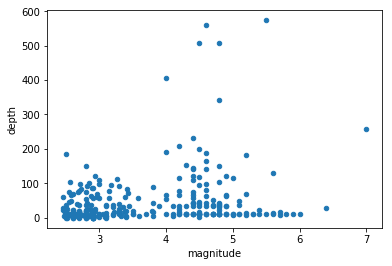

In [12]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [13]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [14]:
# read it back later

new_df = pd.DataFrame.from_csv('usgs_earthquake_data.csv')

print(new_df.head())

   magnitude  depth
0        2.9    0.0
1        3.1   13.4
2        2.6    5.4
3        3.3   24.4
4        5.1   10.0


C:\Users\moni_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [15]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [16]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky','key':''}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=young+library+uky&key=


In [17]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account', 'results': [], 'status': 'REQUEST_DENIED'}


In [18]:
# print it more nicely

pp.pprint(data)

{'error_message': 'You must use an API key to authenticate each request to '
                  'Google Maps Platform APIs. For additional information, '
                  'please refer to http://g.co/dev/maps-no-account',
 'results': [],
 'status': 'REQUEST_DENIED'}


In [19]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [20]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [21]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *
#navita.io for key

In [22]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [36]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 2
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

RT @KentuckyMBB: #BBN, it's not too late to join. Exclusive content that you won't find anywhere else. Directions ⤵️ https://t.co/ichzpiMD8m
RT @UKSwimDive: Party of nine. 

😼🎟🏊‍♀️

#LockedIn https://t.co/2CR1gOIRRx


In [24]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Mar 06 22:20:10 +0000 2019',
 'entities': {'hashtags': [{'indices': [17, 21], 'text': 'BBN'}],
              'symbols': [],
              'urls': [{'display_url': 'twitter.com/KentuckyMBB/st…',
                        'expanded_url': 'https://twitter.com/KentuckyMBB/status/1087141644867112961',
                        'indices': [117, 140],
                        'url': 'https://t.co/ichzpiMD8m'}],
              'user_mentions': [{'id': 35583547,
                                 'id_str': '35583547',
                                 'indices': [3, 15],
                                 'name': 'Kentucky Basketball',
                                 'screen_name': 'KentuckyMBB'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1103420031386435586,
 'id_str': '1103420031386435586',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': 

### Other API endpoints allow different types of searches

In [61]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#BBN', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @_iamGS3_: Blessed to receive an offer from the University of Kentucky 🔵⚪️ #BBN https://t.co/3lO7MaazsZ

RT @PatrickLoney: #BBN can you get me to 6,000 followers?

RT @EricThomas0523: Should’ve been 3 in a row 😩 #BBN https://t.co/fOg9rK2J2V

Isaac Humphries - ‘Say Something’ https://t.co/S8Wg6PIYGB via @YouTube #BBN #MustHear @IsaacHumphries7

RT @Nthepost: #BBN https://t.co/zOpy0ltNRq



In [37]:
# search for public tweets in bangla

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'bn', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

@Mechanicsudipto @70chatterjee @parthagee @DilipGhoshBJP @WBPolice তো?

ড.নিতাই কুমার সাহা  _ সহকারী অধ্যাপক, মনোবিজ্ঞান বিভাগ, রাজশাহী কলেজ https://t.co/IH9Y0YgTEM via @YouTube

কুয়াকাটা হুজুরের গজল না স্লোগান https://t.co/hupM3RnmKN via @YouTube

@parthagee @DilipGhoshBJP @WBPolice কি লোক 
পুরো ঢক্কন একটা

@Delowarhafiz মুর্সিদরা পুরানো হলে একদিন ঠিকই টের পেয়ে যাবে। আমি যতটা সম্ভব এইসবদের থেকে দূরে থাকার চেষ্টা করি।



In [38]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 10
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

I would like to scream

Students Make the Best Teachers! New BLOG! Students Make the Best Teachers  https://t.co/h4fau911BK

I hope Dr. Everett McCorvey sings the national anthem Saturday at Rupp Arena. He would be perfect for UK Senior Day… https://t.co/4TVMbwQBS0

Madama Butterfly 🦋
#Opera #GNO @ Singletary Center for the Arts https://t.co/XgxZUlBBB5

hbd justin bieber ( michael_rutherford_ ) hope you have the worst day ever cause you deserve it 🥴 swipe for a surpr… https://t.co/cKupMId15q

.@universityofky can you please turn on the heat in the graduate student study? It's hard to write dissertations wi… https://t.co/bzFJSE26lc

Thanks uk_bgpsa !  We want to share to help, sharing is caring!… https://t.co/BmgJMqy09a



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

In [42]:
# search for public tweets about #OSCAR in english

endpoint = 'search/tweets'
params = {
    'q': '#OSCAR', 
    'count': 5,
     'lang': 'en',
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @dneg: Just a normal day at work today... #oscar #photoshoot #sneakpeek 
"Everyone at DNEG is an Oscar winner!" #firstman https://t.co/N…

RT @BHlive_official: Edin Dzeko looking to win his first #Oscar.. 😂 #PortoRoma 

 https://t.co/xZkIcYcArR

RT @LiveCivil: Vanity Fairs #Oscar After Party with Gabrielle Union. 😍 https://t.co/PtaXgzqqxw

ICYMI: @iammikemuse talked with #Oscar-winning director @pramsey342 about making #IntoTheSpiderverse representative… https://t.co/ckkeWsyzR6



In [48]:
# search for public tweets about #বাংলাদেশ in bangla
endpoint = 'search/tweets'
params = {
    'q': '#বাংলাদেশ', 
    'lang': 'bn', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

#বাংলাদেশ
#ইপিআই
#টিটি
#টিডি
বর্তমানে ব্যবহৃত টিটি টিকার ভায়াল শেষ হলে সম্প্রসারিত টিকাদান কর্মসূচি (ইপিআই)-এর নি… https://t.co/NV1D00STgq

- ধর্ষণের সাজা....
#বাংলাদেশ
🚫 প্রতিবাদ
🚫 ফেসবুক স্ট্যাটাস
🚫 ধর্না
🚫 তদন্ত
🚫 সমঝোতার চেষ্টা
🚫 ঘুষ দেওয়া
🚫 ধমক-চমক… https://t.co/rAOmN1QF8S



In [55]:
# more data fields

endpoint = 'search/tweets'
params = {
    'q': '#spring break',
    'location': 'University of Kentucky, Lexington, KY',
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

Start planning today: There's lots to do this March Break in Durham Region #marchbreak #spring

https://t.co/JyhHa1JW0i

Where are you travelling this #spring break? Tell us in comments! https://t.co/TaUj7YXaNq

Though I’m desperate for some sun, this read is making me rethink my #Spring travel plans...

U.S. Issues Travel Wa… https://t.co/fQXCo6zvOM

We had a #spring #style teaser during our #winter break vacation. It’s a bummer that we have approximately 60 days… https://t.co/uDZTXQFqcy

Spring break is next week! Stop by for a treat. Open 7 days. #spring #springbreak #somethingforeveryone #keto… https://t.co/HJceM4kyEa



### Bonus: Streaming live tweets in real time 

In [28]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Wed Mar 06 23:41:47 +0000 2019
Senegal, Senegal
Tu voulais dire les mancuniens ??

Wed Mar 06 23:41:47 +0000 2019
Waco, TX, United States
@dahliajrendon Me!!!

Wed Mar 06 23:41:47 +0000 2019
Quito, Ecuador, Ecuador
@jfcarpio ✋

Wed Mar 06 23:41:47 +0000 2019
Candelaria, Colombia, Colombia
MDL.

Wed Mar 06 23:41:47 +0000 2019
Ciudad Autónoma de Buenos Aires, Argentina, Argentina
UPD y que mejor que vivirlo con ustedes 🎉❤️💣DALE QUE SI, ESTO RECIÉN EMPIEZAAAA en Plaza Arenales https://t.co/imiCtIJn9z

Wed Mar 06 23:41:47 +0000 2019
Batavia, NY, United States
Both my fucking girls went home on the Bachlor so wtf is the point ..

Wed Mar 06 23:41:47 +0000 2019
Osasco, Brasil, Brasil
Dor de cabeça agr posh

Wed Mar 06 23:41:46 +0000 2019
Rhinelander, WI, United States
Caught the sunset at Rhinelander airport tonight. What a beaut! #wisconsin #sunset #rhinelander https://t.co/kdGmFUWpGE

Wed Mar 06 23:41:47 +0000 2019
Yorkshire and The Humber, England, United Kingdom
@TheMattWain The Nordic M

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

In [57]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'lat': [q['geometry']['coordinates'][0] for q in quakes],
     'long': [q['geometry']['coordinates'][1] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

290


In [58]:
df.head()

,lat,long
0,-157.2250,66.2829
1,-157.3818,66.2305
2,-157.4072,66.2194
3,-157.1878,66.3447
4,-177.7028,-32.1609


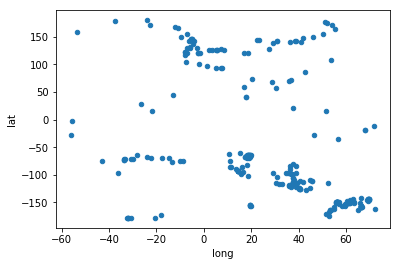

In [59]:
# plot the lat vs. long

df.plot(x='long', y='lat', kind='scatter')

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  
